In [1]:
# SPDX-FileCopyrightText: 2020 G2Elab / MAGE
#
# SPDX-License-Identifier: Apache-2.0

# if NoLoad is not installed 
!pip install noload --quiet

<H1>NoLoad tutorial</H1>
Based on test functions: <A 
href="https://en.wikipedia.org/wiki/Test_functions_for_optimization"
target="_blank">https://en.wikipedia.org/wiki/Test_functions_for_optimization</A>


<H2>Unconstrained mono-objective optimization</H2>

<img src=".\img\bar.png"/>
<img src=".\img\Ackley.png"/>

<H3>function definition</H3>

In [2]:
def ackley(x,y):
    import autograd.numpy as np
    import math

    fobj = -20 * np.exp(-0.2 * np.sqrt(0.5 * (np.square(x) +np.square(y)))) - \
           np.exp(0.5 * (np.cos(2 * math.pi * x) + np.cos(2 * math.pi * y)))\
           + math.exp(1) + 20
    return locals().items()

<H3>plot function</H3>

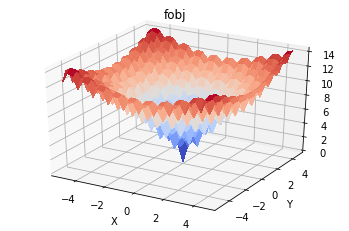

In [3]:
#Plot
from plotTools import plot3D
%matplotlib inline
plot3D(ackley, [[-5,5],[-5,5]])

<H3>optimize using NoLoad</H3>

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.644375817899117e-05
            Iterations: 9
            Function evaluations: 20
            Gradient evaluations: 9
{'x': 1.5781116638803522e-05, 'y': 1.739422385733534e-05}
{'fobj': 6.644375817899117e-05}


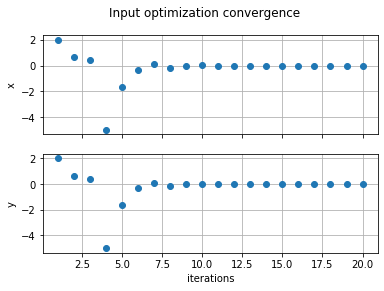

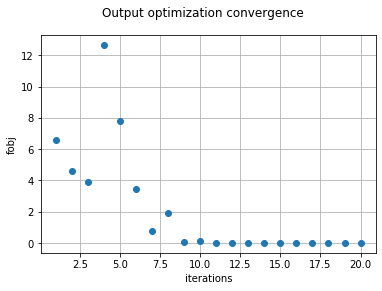

In [4]:
#Optimize
from noload.optimization.optimProblem import Spec, OptimProblem
#This function is non derivable in [0,0] that can lead to convergence issue.
#Initial guess must be different from [0,0]
spec = Spec(variables={'x':2, 'y':2}, bounds={'x':[-5, 5], 'y':[-5, 5]}, 
            objectives={'fobj':[0.,15.]})
optim = OptimProblem(model=ackley, specifications=spec)
result = optim.run()

result.printResults()
result.plotResults()